In [ ]:
画图

各格式在各任务各指标的平均得分

【LATEX】
--------------------------------------------------------------------------------
  Fact Checking (样本数: 1217)
    F1: 71.44
    EM: 66.31
  Numerical Reasoning (样本数: 771)
    F1: 66.40
    EM: 61.35
  Structure Comprehending (样本数: 393)
    F1: 81.56
    EM: 78.37
  Data Analysis (样本数: 533)
    ROUGE-L: 29.64
  Visualization (样本数: 154)
    ECR: 10.39 (16/154)
    Pass: 0.00 (0/154)

【HTML】
--------------------------------------------------------------------------------
  Fact Checking (样本数: 1214)
    F1: 26.69
    EM: 22.98
  Numerical Reasoning (样本数: 771)
    F1: 27.64
    EM: 23.09
  Structure Comprehending (样本数: 393)
    F1: 46.70
    EM: 41.73
  Data Analysis (样本数: 531)
    ROUGE-L: 25.97
  Visualization (样本数: 154)
    ECR: 12.99 (20/154)
    Pass: 0.00 (0/154)

【JSON】
--------------------------------------------------------------------------------
  Fact Checking (样本数: 1217)
    F1: 66.29
    EM: 61.71
  Numerical Reasoning (样本数: 768)
    F1: 64.25
    EM: 5

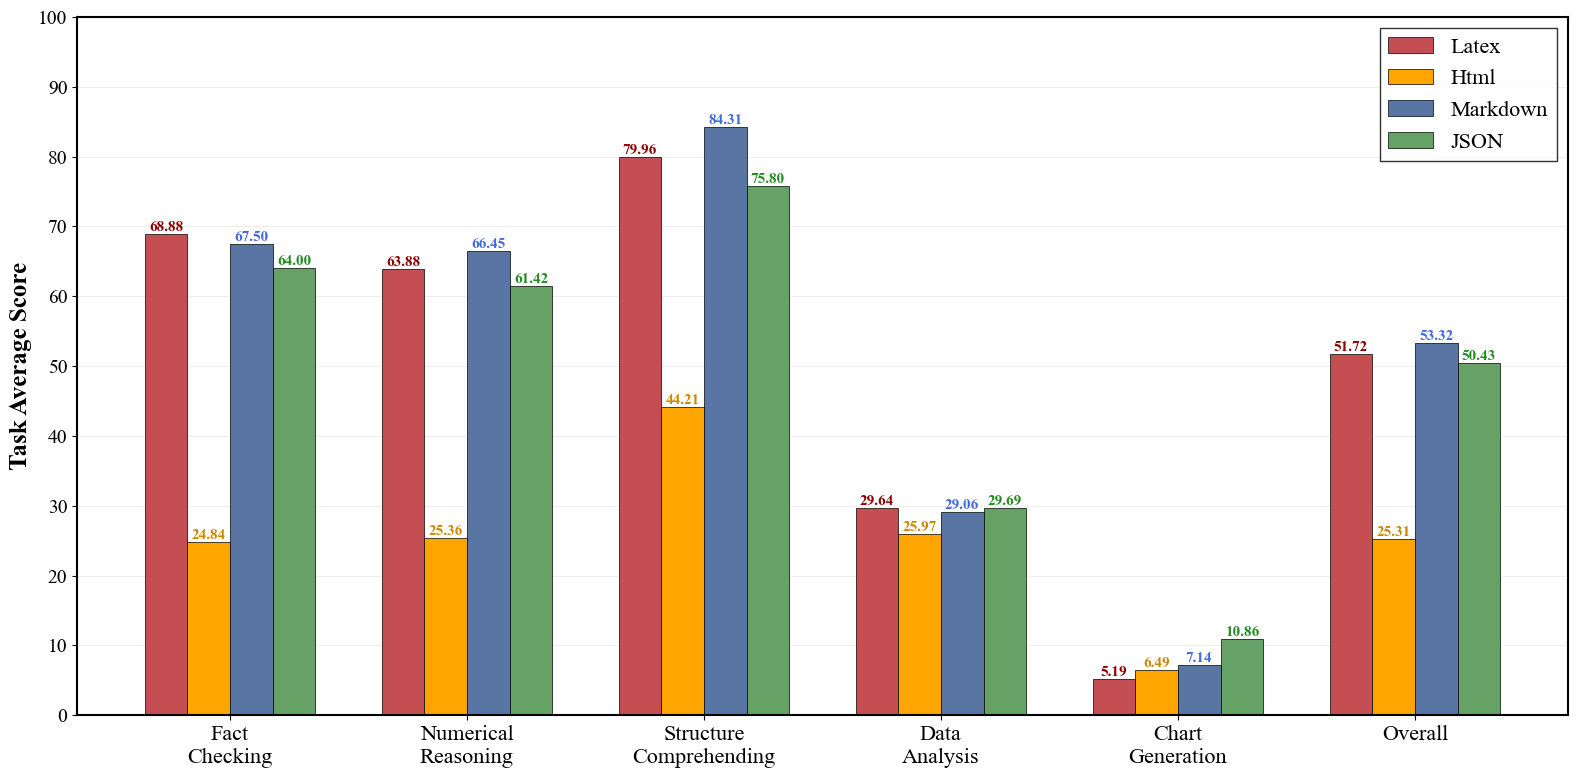


柱状图已保存为: task_comparison_with_overall.png

任务平均得分汇总表 (Task Average Score)
Task                      LATEX        HTML         MARKDOWN     JSON        
--------------------------------------------------------------------------------
Fact Checking                  68.88       24.84       67.50       64.00
Numerical Reasoning            63.88       25.36       66.45       61.42
Structure Comprehending        79.96       44.21       84.31       75.80
Data Analysis                  29.64       25.97       29.06       29.69
Visualization                   5.19        6.49        7.14       10.86
--------------------------------------------------------------------------------
Overall                        51.72       25.31       53.32       50.43


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14

# 读取四个CSV文件
latex_df = pd.read_csv('glm46v_moe_text_latex_new.csv')
html_df = pd.read_csv('glm46v_moe_text_html_new.csv')
json_df = pd.read_csv('glm46v_moe_text_json_new.csv')
markdown_df = pd.read_csv('glm46v_moe_text_markdown_new.csv')

# 创建格式名称和数据框的映射
formats = {
    'latex': latex_df,
    'html': html_df,
    'json': json_df,
    'markdown': markdown_df
}

# 定义任务和对应的指标
task_metrics = {
    'Fact Checking': ['F1', 'EM'],
    'Numerical Reasoning': ['F1', 'EM'],
    'Structure Comprehending': ['F1', 'EM'],
    'Data Analysis': ['ROUGE-L'],
    'Visualization': ['ECR', 'Pass']
}

# 存储所有结果
results = {fmt: {} for fmt in formats.keys()}

# 存储所有得分用于计算总平均
overall_scores = {fmt: [] for fmt in formats.keys()}

print("=" * 80)
print("各格式在各任务各指标的平均得分")
print("=" * 80)

# 计算每种格式在每个任务的每个指标的得分
for format_name, df in formats.items():
    print(f"\n【{format_name.upper()}】")
    print("-" * 80)
    
    for task, metrics in task_metrics.items():
        task_data = df[df['QuestionType'] == task]
        total_count = len(task_data)
        
        if total_count == 0:
            print(f"  {task}: 无数据")
            results[format_name][task] = []
            continue
        
        print(f"  {task} (样本数: {total_count})")
        
        task_scores = []
        
        for metric in metrics:
            if metric in ['F1', 'EM', 'ROUGE-L']:
                # 这些指标直接取平均值(已经是百分制)
                avg_score = task_data[metric].mean()
                task_scores.append(avg_score)
                overall_scores[format_name].append(avg_score)
                print(f"    {metric}: {avg_score:.2f}")
            
            elif metric in ['ECR', 'Pass']:
                # 这些指标计算TRUE的占比(百分制,不显示百分号)
                true_count = (task_data[metric] == True).sum() + (task_data[metric] == 'TRUE').sum()
                percentage = (true_count / total_count) * 100
                task_scores.append(percentage)
                overall_scores[format_name].append(percentage)
                print(f"    {metric}: {percentage:.2f} ({true_count}/{total_count})")
        
        results[format_name][task] = task_scores

print("\n" + "=" * 80)

# 计算每个任务的平均得分(所有指标的平均)
task_avg_scores = {fmt: {} for fmt in formats.keys()}

for format_name in formats.keys():
    for task in task_metrics.keys():
        if results[format_name][task]:
            task_avg_scores[format_name][task] = np.mean(results[format_name][task])
        else:
            task_avg_scores[format_name][task] = 0

# 计算总平均得分
format_overall_avg = {}
print("\n各格式总平均得分:")
print("-" * 80)
for format_name in formats.keys():
    if overall_scores[format_name]:
        avg = np.mean(overall_scores[format_name])
        format_overall_avg[format_name] = avg
        print(f"{format_name.upper()}: {avg:.2f}")
    else:
        format_overall_avg[format_name] = 0

print("=" * 80)

# 绘制柱状图 - 包含5个任务 + 总得分
tasks = ['Fact\nChecking', 'Numerical\nReasoning', 'Structure\nComprehending', 
         'Data\nAnalysis', 'Chart\nGeneration', 'Overall']
task_keys = list(task_metrics.keys())
format_names = ['latex', 'html', 'markdown', 'json']
format_labels = ['Latex', 'Html', 'Markdown', 'JSON']  # 修改这里：CSV改为JSON

# 颜色方案 - 模仿参考图
colors = ['#C44E52', '#FFA500', '#5975A4', '#66A266']

x = np.arange(len(tasks))
width = 0.18  # 每个柱子的宽度

fig, ax = plt.subplots(figsize=(16, 8))

# 收集所有分数以确定y轴范围(包括总得分)
all_scores = []
for fmt in format_names:
    all_scores.extend([task_avg_scores[fmt][task] for task in task_keys])
    all_scores.append(format_overall_avg[fmt])

max_score = max(all_scores)
# y轴上限设置为最大值的1.15倍,确保有足够空间显示标签
y_max = max_score * 1.15
# 向上取整到最近的10
y_max = int(np.ceil(y_max / 10) * 10)

# 为每种格式绘制柱子
bars_list = []
for i, (fmt, color, label) in enumerate(zip(format_names, colors, format_labels)):
    # 前5个是各任务得分,最后1个是总得分
    scores = [task_avg_scores[fmt][task] for task in task_keys] + [format_overall_avg[fmt]]
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, scores, width, label=label, color=color, 
                   edgecolor='black', linewidth=0.5)
    bars_list.append(bars)
    
    # 在柱子顶部添加数值标签
    for j, (bar, score) in enumerate(zip(bars, scores)):
        height = bar.get_height()
        # 根据格式选择颜色
        text_colors = ['#8B0000', '#CC8800', '#4169E1', '#228B22']
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.2f}',
                ha='center', va='bottom', fontsize=11, 
                color=text_colors[i], fontweight='bold')

# 设置图表
ax.set_xlabel('', fontsize=16, fontweight='bold')
ax.set_ylabel('Task Average Score', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontsize=16, fontweight='normal')
ax.set_ylim(0, y_max)
ax.set_yticks(np.arange(0, y_max + 1, 10))

# 设置图例 - 放在右上角
ax.legend(fontsize=16, loc='upper right', frameon=True, 
          edgecolor='black', fancybox=False, shadow=False)

# 设置网格
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# 设置背景色为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 添加边框
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.savefig('task_comparison_with_overall.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n柱状图已保存为: task_comparison_with_overall.png")

# 打印任务平均得分汇总表(包括总得分)
print("\n" + "=" * 80)
print("任务平均得分汇总表 (Task Average Score)")
print("=" * 80)
print(f"{'Task':<25} {'LATEX':<12} {'HTML':<12} {'MARKDOWN':<12} {'JSON':<12}")
print("-" * 80)
for i, task in enumerate(task_keys):
    scores_str = "  ".join([f"{task_avg_scores[fmt][task]:>10.2f}" for fmt in format_names])
    print(f"{task:<25} {scores_str}")
print("-" * 80)
# 添加总得分行
overall_scores_str = "  ".join([f"{format_overall_avg[fmt]:>10.2f}" for fmt in format_names])
print(f"{'Overall':<25} {overall_scores_str}")
print("=" * 80)

In [ ]:
markdown统计各领域，画图

领域数据统计

各领域数据量:
--------------------------------------------------------------------------------
economy: 562
science: 386
society: 371
labor: 339
health: 223
employment: 178
environment: 176
education: 161
manufacture: 102
sport: 78
food: 61
religion: 61
biology: 55
business: 54
agriculture: 52
activitytime: 43
welfare: 42
injuries: 35
productivity: 20
medical: 20
geography: 15
energy: 15
military: 14
transport: 5

计算各领域在所有任务所有指标上的平均得分

【ECONOMY】(样本数: 562)
--------------------------------------------------------------------------------
  Fact Checking (样本数: 196)
    F1: 69.66
    EM: 63.27
  Numerical Reasoning (样本数: 161)
    F1: 71.84
    EM: 63.98
  Structure Comprehending (样本数: 86)
    F1: 88.77
    EM: 84.88
  Data Analysis (样本数: 99)
    ROUGE-L: 26.00
  Visualization (样本数: 20)
    ECR: 15.00
    Pass: 0.00
  总平均得分: 53.71

【SCIENCE】(样本数: 386)
--------------------------------------------------------------------------------
  Fact Checking (样本数: 186)
    F1: 76.39
    EM: 74.19
  Nu

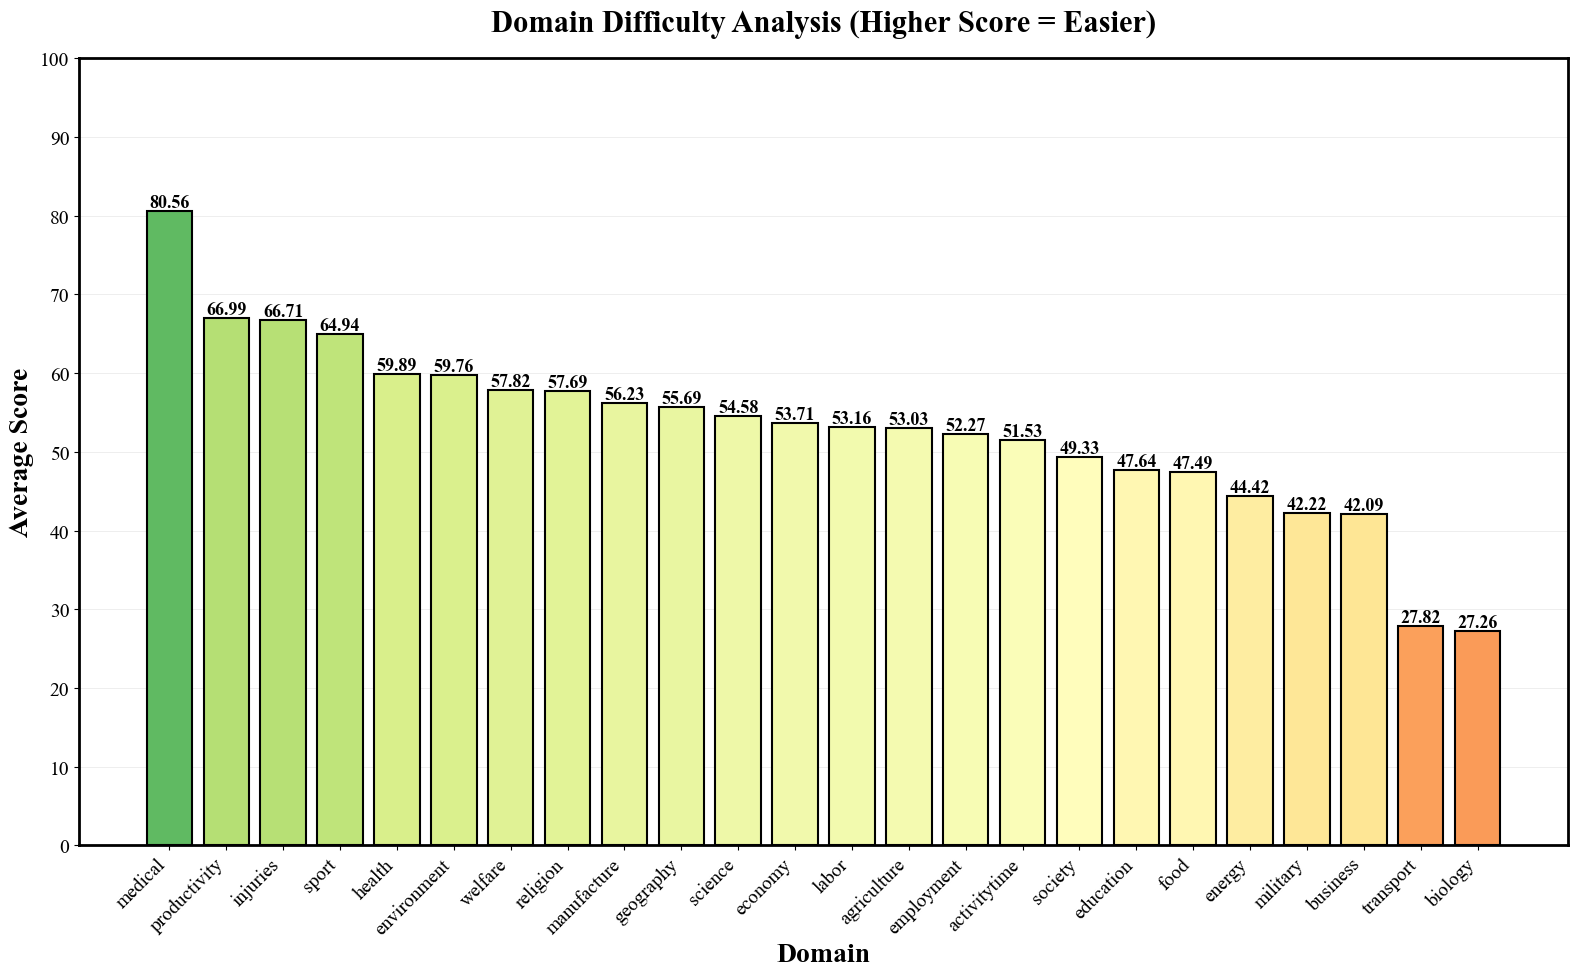


高清柱状图已保存为: domain_difficulty_analysis.png

领域得分汇总表
Rank   Domain               Avg Score    Sample Count    Difficulty     
--------------------------------------------------------------------------------
1      medical              80.56        20              Easy           
2      productivity         66.99        20              Easy           
3      injuries             66.71        35              Easy           
4      sport                64.94        78              Easy           
5      health               59.89        223             Medium         
6      environment          59.76        176             Medium         
7      welfare              57.82        42              Medium         
8      religion             57.69        61              Medium         
9      manufacture          56.23        102             Medium         
10     geography            55.69        15              Medium         
11     science              54.58        386             Medium 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14

# 读取CSV文件
df = pd.read_csv('glm46v_moe_text_markdown_new.csv')

# 从FileName中提取领域
def extract_domain(filename):
    if pd.isna(filename) or filename == '':
        return 'Unknown'
    # 提取短横线前面的单词
    domain = filename.split('-')[0]
    return domain

df['Domain'] = df['FileName'].apply(extract_domain)

# 定义任务和对应的指标
task_metrics = {
    'Fact Checking': ['F1', 'EM'],
    'Numerical Reasoning': ['F1', 'EM'],
    'Structure Comprehending': ['F1', 'EM'],
    'Data Analysis': ['ROUGE-L'],
    'Visualization': ['ECR', 'Pass']
}

print("=" * 80)
print("领域数据统计")
print("=" * 80)

# 统计每个领域的数量
domain_counts = df['Domain'].value_counts()
print("\n各领域数据量:")
print("-" * 80)
for domain, count in domain_counts.items():
    print(f"{domain}: {count}")

print("\n" + "=" * 80)
print("计算各领域在所有任务所有指标上的平均得分")
print("=" * 80)

# 存储各领域的所有得分
domain_scores = {}

for domain in domain_counts.index:
    domain_data = df[df['Domain'] == domain]
    all_scores = []
    
    print(f"\n【{domain.upper()}】(样本数: {len(domain_data)})")
    print("-" * 80)
    
    for task, metrics in task_metrics.items():
        task_data = domain_data[domain_data['QuestionType'] == task]
        
        if len(task_data) == 0:
            continue
        
        print(f"  {task} (样本数: {len(task_data)})")
        
        for metric in metrics:
            if metric in ['F1', 'EM', 'ROUGE-L']:
                # 这些指标直接取平均值(已经是百分制)
                avg_score = task_data[metric].mean()
                all_scores.append(avg_score)
                print(f"    {metric}: {avg_score:.2f}")
            
            elif metric in ['ECR', 'Pass']:
                # 这些指标计算TRUE的占比(百分制)
                true_count = (task_data[metric] == True).sum() + (task_data[metric] == 'TRUE').sum()
                total_count = len(task_data)
                percentage = (true_count / total_count) * 100
                all_scores.append(percentage)
                print(f"    {metric}: {percentage:.2f}")
    
    # 计算该领域的总平均得分
    if all_scores:
        domain_avg = np.mean(all_scores)
        domain_scores[domain] = domain_avg
        print(f"  总平均得分: {domain_avg:.2f}")
    else:
        domain_scores[domain] = 0

print("\n" + "=" * 80)

# 按得分从高到低排序
sorted_domains = sorted(domain_scores.items(), key=lambda x: x[1], reverse=True)

print("\n领域难度排名 (得分从高到低,得分越低越难):")
print("-" * 80)
for rank, (domain, score) in enumerate(sorted_domains, 1):
    count = domain_counts[domain]
    print(f"{rank}. {domain}: {score:.2f} (样本数: {count})")
print("=" * 80)

# 绘制柱状图 - 提高清晰度
domains = [item[0] for item in sorted_domains]
scores = [item[1] for item in sorted_domains]

# 增加图片尺寸和DPI
fig, ax = plt.subplots(figsize=(16, 10))

# 确定y轴范围
max_score = max(scores) if scores else 100
y_max = max_score * 1.15
y_max = int(np.ceil(y_max / 10) * 10)

# 创建颜色渐变(从绿色到红色,绿色表示简单,红色表示困难)
colors_gradient = plt.cm.RdYlGn([score/100 for score in scores])

x = np.arange(len(domains))
bars = ax.bar(x, scores, color=colors_gradient, edgecolor='black', linewidth=1.5)

# 在柱子顶部添加数值标签 - 增大字体
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.2f}',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

# 设置图表 - 增大字体
ax.set_xlabel('Domain', fontsize=20, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=20, fontweight='bold')
ax.set_title('Domain Difficulty Analysis (Higher Score = Easier)', fontsize=22, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(domains, rotation=45, ha='right', fontsize=14)
ax.set_ylim(0, y_max)
ax.set_yticks(np.arange(0, y_max + 1, 10))

# 设置刻度标签字体大小
ax.tick_params(axis='both', which='major', labelsize=14)

# 设置网格
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# 设置背景色为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 添加边框
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.tight_layout()
# 大幅提高DPI到600,并使用高质量保存
plt.savefig('domain_difficulty_analysis.png', dpi=600, bbox_inches='tight', 
            facecolor='white', edgecolor='none', format='png')
plt.show()

print("\n高清柱状图已保存为: domain_difficulty_analysis.png")

# 打印汇总表
print("\n" + "=" * 80)
print("领域得分汇总表")
print("=" * 80)
print(f"{'Rank':<6} {'Domain':<20} {'Avg Score':<12} {'Sample Count':<15} {'Difficulty':<15}")
print("-" * 80)
for rank, (domain, score) in enumerate(sorted_domains, 1):
    count = domain_counts[domain]
    if score >= 60:
        difficulty = "Easy"
    elif score >= 40:
        difficulty = "Medium"
    else:
        difficulty = "Hard"
    print(f"{rank:<6} {domain:<20} {score:<12.2f} {count:<15} {difficulty:<15}")
print("=" * 80)

In [ ]:
markdown统计单表/多表

单表和多表数据统计

表类型数据量:
--------------------------------------------------------------------------------
Single Table: 2971
Multi Table: 97

单表和多表在各任务各指标的平均得分

【SINGLE TABLE】(样本数: 2971)
--------------------------------------------------------------------------------
  Fact Checking (样本数: 1171)
    F1: 69.88
    EM: 64.73
  Numerical Reasoning (样本数: 750)
    F1: 68.89
    EM: 63.33
  Structure Comprehending (样本数: 382)
    F1: 85.52
    EM: 82.72
  Data Analysis (样本数: 520)
    ROUGE-L: 29.25
  Visualization (样本数: 148)
    ECR: 14.19 (21/148)
    Pass: 0.00 (0/148)

【MULTI TABLE】(样本数: 97)
--------------------------------------------------------------------------------
  Fact Checking (样本数: 46)
    F1: 73.19
    EM: 71.74
  Numerical Reasoning (样本数: 21)
    F1: 80.95
    EM: 76.19
  Structure Comprehending (样本数: 11)
    F1: 90.91
    EM: 90.91
  Data Analysis (样本数: 13)
    ROUGE-L: 21.61
  Visualization (样本数: 6)
    ECR: 16.67 (1/6)
    Pass: 0.00 (0/6)

各表类型总平均得分:
-----------------------------

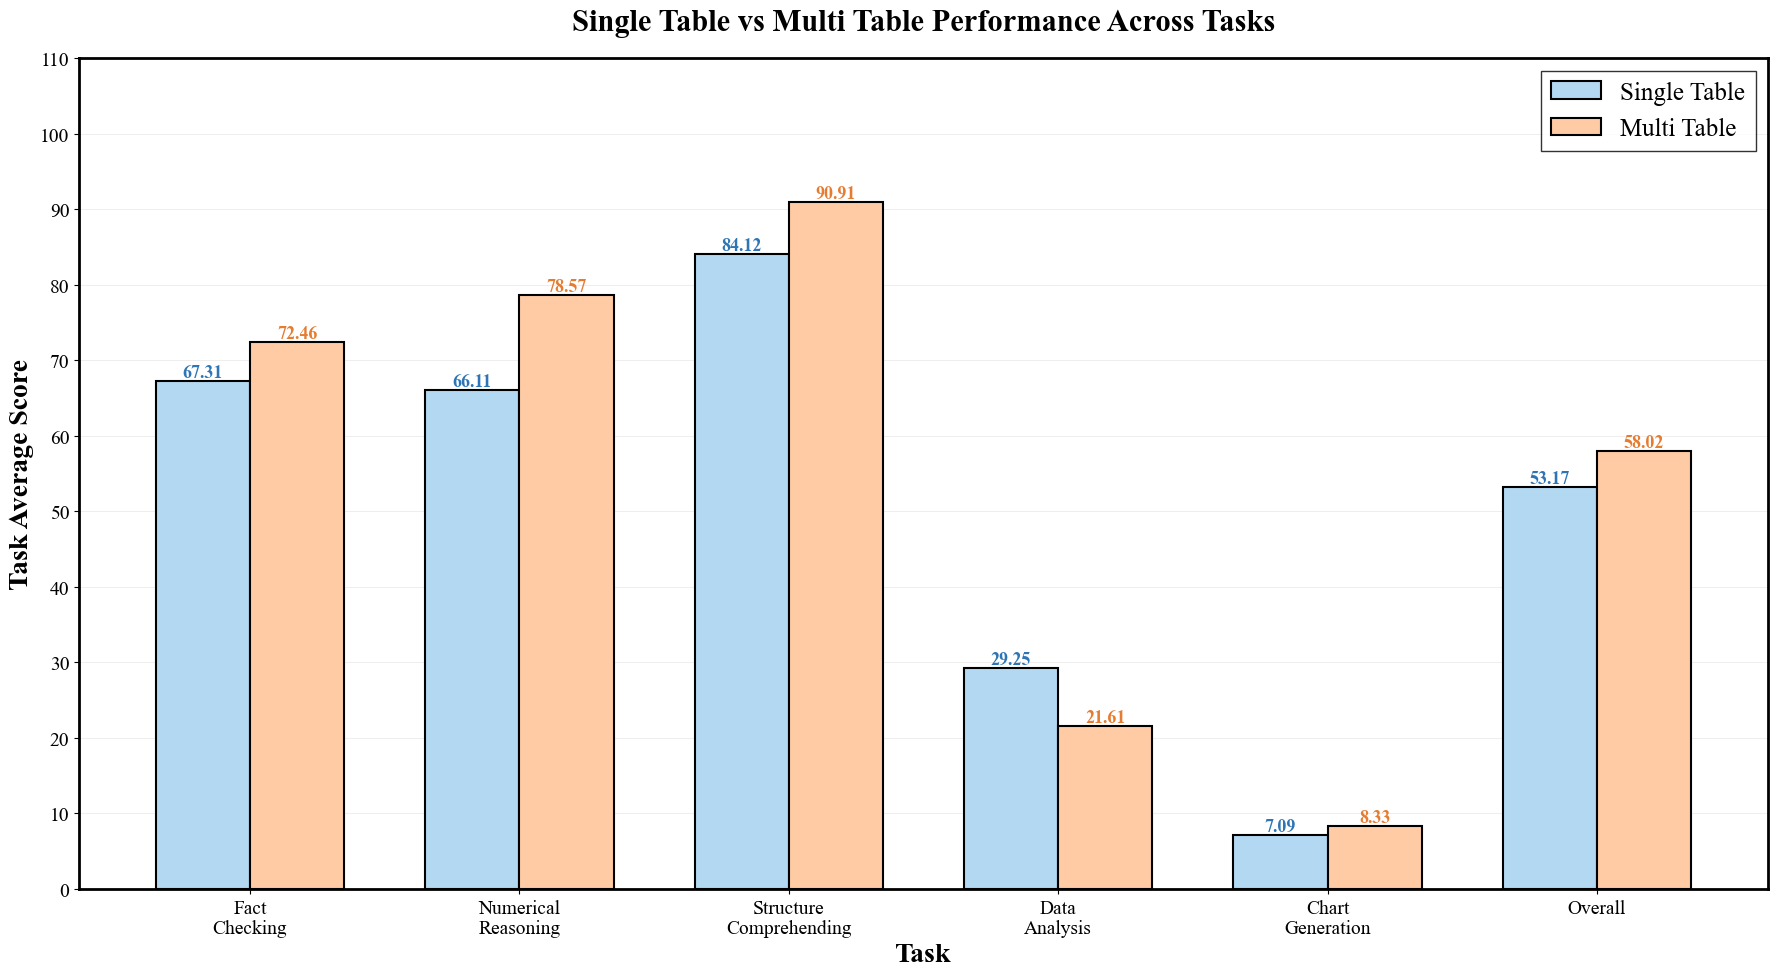


高清柱状图已保存为: single_vs_multi_table_comparison.png

单表 vs 多表任务平均得分汇总表
Task                      Single Table    Multi Table     Difference     
--------------------------------------------------------------------------------
Fact Checking                     67.31          72.46          -5.16
Numerical Reasoning               66.11          78.57         -12.46
Structure Comprehending           84.12          90.91          -6.79
Data Analysis                     29.25          21.61           7.64
Visualization                      7.09           8.33          -1.24
--------------------------------------------------------------------------------
Overall                           53.17          58.02          -4.85

CompStrucCata详细分布

多表类型:
  StructureCompound: 97

单表类型 (其他所有类型):
  ColumnHeaderMerge: 900
  MultiColumnClassified: 675
  SingleRowClassified: 614
  ContentCompound: 493
  ExternalSupply: 216
  BackgroundColor: 73

单表总计: 2971
多表总计: 97


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14

# 读取CSV文件
df = pd.read_csv('glm46v_moe_text_markdown_new.csv')

# 重新定义单表和多表类别
# 只有StructureCompound是多表,其他都是单表
multi_table_types = ['StructureCompound']
# 其他所有类型都是单表

# 分类函数
def classify_table_type(comp_struc_cata):
    if pd.isna(comp_struc_cata) or comp_struc_cata == '':
        return 'Unknown'
    if comp_struc_cata in multi_table_types:
        return 'Multi Table'
    else:
        return 'Single Table'

df['TableType'] = df['CompStrucCata'].apply(classify_table_type)

# 定义任务和对应的指标
task_metrics = {
    'Fact Checking': ['F1', 'EM'],
    'Numerical Reasoning': ['F1', 'EM'],
    'Structure Comprehending': ['F1', 'EM'],
    'Data Analysis': ['ROUGE-L'],
    'Visualization': ['ECR', 'Pass']
}

print("=" * 80)
print("单表和多表数据统计")
print("=" * 80)

# 统计单表和多表的数量
table_type_counts = df['TableType'].value_counts()
print("\n表类型数据量:")
print("-" * 80)
for table_type, count in table_type_counts.items():
    print(f"{table_type}: {count}")

print("\n" + "=" * 80)
print("单表和多表在各任务各指标的平均得分")
print("=" * 80)

# 存储结果
results = {}
task_avg_scores = {}
overall_all_scores = {}  # 存储所有指标得分用于计算总平均

for table_type in ['Single Table', 'Multi Table']:
    if table_type not in df['TableType'].values:
        continue
    
    type_data = df[df['TableType'] == table_type]
    results[table_type] = {}
    task_avg_scores[table_type] = {}
    overall_all_scores[table_type] = []
    
    print(f"\n【{table_type.upper()}】(样本数: {len(type_data)})")
    print("-" * 80)
    
    for task, metrics in task_metrics.items():
        task_data = type_data[type_data['QuestionType'] == task]
        total_count = len(task_data)
        
        if total_count == 0:
            print(f"  {task}: 无数据")
            results[table_type][task] = []
            continue
        
        print(f"  {task} (样本数: {total_count})")
        
        task_scores = []
        
        for metric in metrics:
            if metric in ['F1', 'EM', 'ROUGE-L']:
                # 这些指标直接取平均值(已经是百分制)
                avg_score = task_data[metric].mean()
                task_scores.append(avg_score)
                overall_all_scores[table_type].append(avg_score)
                print(f"    {metric}: {avg_score:.2f}")
            
            elif metric in ['ECR', 'Pass']:
                # 这些指标计算TRUE的占比(百分制)
                true_count = (task_data[metric] == True).sum() + (task_data[metric] == 'TRUE').sum()
                percentage = (true_count / total_count) * 100
                task_scores.append(percentage)
                overall_all_scores[table_type].append(percentage)
                print(f"    {metric}: {percentage:.2f} ({true_count}/{total_count})")
        
        results[table_type][task] = task_scores
        # 计算该任务的平均得分
        if task_scores:
            task_avg_scores[table_type][task] = np.mean(task_scores)
        else:
            task_avg_scores[table_type][task] = 0

# 计算总平均得分
overall_avg_scores = {}
print("\n各表类型总平均得分:")
print("-" * 80)
for table_type in ['Single Table', 'Multi Table']:
    if table_type in overall_all_scores and overall_all_scores[table_type]:
        avg = np.mean(overall_all_scores[table_type])
        overall_avg_scores[table_type] = avg
        print(f"{table_type}: {avg:.2f}")
    else:
        overall_avg_scores[table_type] = 0

print("=" * 80)

# 绘制柱状图 - 高清晰度,包含Overall
tasks = ['Fact\nChecking', 'Numerical\nReasoning', 'Structure\nComprehending', 
         'Data\nAnalysis', 'Chart\nGeneration', 'Overall']
task_keys = list(task_metrics.keys())
table_types = ['Single Table', 'Multi Table']
table_labels = ['Single Table', 'Multi Table']

# 颜色方案 - 浅天蓝和浅蜜桃橙
colors = ['#B3D9F2', '#FFCBA4']

x = np.arange(len(tasks))
width = 0.35  # 柱子宽度

fig, ax = plt.subplots(figsize=(18, 10))

# 收集所有分数以确定y轴范围(包括Overall)
all_scores = []
for table_type in table_types:
    if table_type in task_avg_scores:
        all_scores.extend([task_avg_scores[table_type].get(task, 0) for task in task_keys])
        all_scores.append(overall_avg_scores.get(table_type, 0))

max_score = max(all_scores) if all_scores else 100
y_max = max_score * 1.15
y_max = int(np.ceil(y_max / 10) * 10)

# 为每种表类型绘制柱子
bars_list = []
for i, (table_type, color, label) in enumerate(zip(table_types, colors, table_labels)):
    if table_type not in task_avg_scores:
        continue
    
    # 前5个是各任务得分,最后1个是总得分
    scores = [task_avg_scores[table_type].get(task, 0) for task in task_keys] + [overall_avg_scores.get(table_type, 0)]
    offset = width * (i - 0.5)
    bars = ax.bar(x + offset, scores, width, label=label, color=color, 
                   edgecolor='black', linewidth=1.5)
    bars_list.append(bars)
    
    # 在柱子顶部添加数值标签
    text_colors = ['#2E75B5', '#E67C30']  # 深蓝和深橙
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.2f}',
                ha='center', va='bottom', fontsize=13, 
                color=text_colors[i], fontweight='bold')

# 设置图表
ax.set_xlabel('Task', fontsize=20, fontweight='bold')
ax.set_ylabel('Task Average Score', fontsize=20, fontweight='bold')
ax.set_title('Single Table vs Multi Table Performance Across Tasks', 
             fontsize=22, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontsize=16, fontweight='normal')
ax.set_ylim(0, y_max)
ax.set_yticks(np.arange(0, y_max + 1, 10))

# 设置刻度标签字体大小
ax.tick_params(axis='both', which='major', labelsize=14)

# 设置图例 - 放在右上角
ax.legend(fontsize=18, loc='upper right', frameon=True, 
          edgecolor='black', fancybox=False, shadow=False)

# 设置网格
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# 设置背景色为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 添加边框
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.tight_layout()
plt.savefig('single_vs_multi_table_comparison.png', dpi=600, bbox_inches='tight', 
            facecolor='white', edgecolor='none', format='png')
plt.show()

print("\n高清柱状图已保存为: single_vs_multi_table_comparison.png")

# 打印汇总表(包括Overall)
print("\n" + "=" * 80)
print("单表 vs 多表任务平均得分汇总表")
print("=" * 80)
print(f"{'Task':<25} {'Single Table':<15} {'Multi Table':<15} {'Difference':<15}")
print("-" * 80)
for task in task_keys:
    single_score = task_avg_scores.get('Single Table', {}).get(task, 0)
    multi_score = task_avg_scores.get('Multi Table', {}).get(task, 0)
    diff = single_score - multi_score
    print(f"{task:<25} {single_score:>13.2f}  {multi_score:>13.2f}  {diff:>13.2f}")
print("-" * 80)
# 添加Overall行
single_overall = overall_avg_scores.get('Single Table', 0)
multi_overall = overall_avg_scores.get('Multi Table', 0)
diff_overall = single_overall - multi_overall
print(f"{'Overall':<25} {single_overall:>13.2f}  {multi_overall:>13.2f}  {diff_overall:>13.2f}")
print("=" * 80)

# 打印详细的CompStrucCata分布
print("\n" + "=" * 80)
print("CompStrucCata详细分布")
print("=" * 80)
comp_struc_counts = df['CompStrucCata'].value_counts()
print("\n多表类型:")
for cat in multi_table_types:
    count = comp_struc_counts.get(cat, 0)
    print(f"  {cat}: {count}")
print("\n单表类型 (其他所有类型):")
single_table_count = 0
for cat, count in comp_struc_counts.items():
    if cat not in multi_table_types and cat != '':
        print(f"  {cat}: {count}")
        single_table_count += count
print(f"\n单表总计: {single_table_count}")
print(f"多表总计: {comp_struc_counts.get('StructureCompound', 0)}")
print("=" * 80)